<a href="https://colab.research.google.com/github/PhanDuyNhat/AI/blob/Code_AI/VN_banknotes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/250
4/4 [==============================] - 8s 1s/step - loss: 2.0791 - accuracy: 0.1122 - val_loss: 2.0599 - val_accuracy: 0.0698
Epoch 2/250
4/4 [==============================] - 4s 1s/step - loss: 2.0459 - accuracy: 0.1837 - val_loss: 2.0489 - val_accuracy: 0.0698
Epoch 3/250
4/4 [==============================] - 4s 1s/step - loss: 1.9986 - accuracy: 0.1429 - val_loss: 2.1069 - val_accuracy: 0.1395
Epoch 4/250
4/4 [==============================] - 5s 986ms/step - loss: 1.9921 - accuracy: 0.1531 - val_loss: 2.0311 - val_accuracy: 0.1628
Epoch 5/250
4/4 [==============================] - 3s 819ms/step - loss: 1.9923 - accuracy: 0.1531 - val_loss: 2.0281 - val_accuracy: 0.1395
Epoch 6/250
4/4 [==============================] - 4s 886ms/step - loss: 1.9657 - accuracy: 0.1939 - val_loss: 1.9974 - val_accuracy: 0.1860
Epoch 7/250
4/4 [==============================] - 4s 1s/step - loss: 1.9512 - accuracy: 0.1633 - val_loss: 1.9428 - val_accuracy: 0.0698
Epoch 8/250
4/4 [========

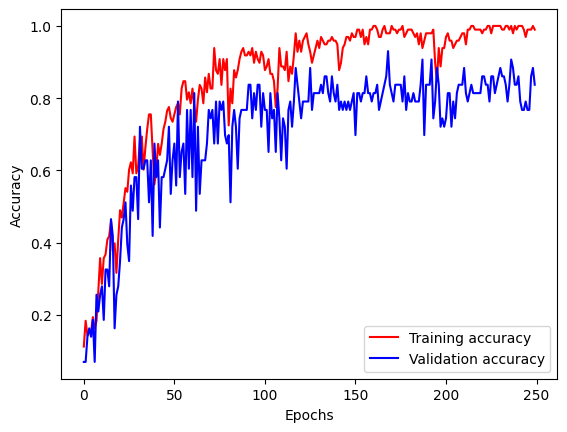

In [3]:
# Import necessary libraries
import os
from os import listdir
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

# Set the data folder and parameters
folder = '/content/drive/MyDrive/PIC_AI/vn_banknotes/Data_Bank/'
input_shape = (100,100, 3)
num_classes = 8

# Load and preprocess the data
photos, labels = list(), list()
for file in listdir(folder):
    output = 0.0
    if  file.startswith('5000'):
        output = 1.0
    elif file.startswith('10000'):
        output = 2.0
    elif file.startswith('20.000'):
        output = 3.0
    elif file.startswith('50.000'):
        output = 4.0
    elif file.startswith('100.000'):
        output = 5.0
    elif file.startswith('200.000'):
        output = 6.0
    elif file.startswith('500.000'):
        output = 7.0

    photo = load_img(folder + file, target_size=input_shape)
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = np.asarray(photos)
labels = np.asarray(labels)

photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(photos, labels, test_size=0.3, random_state=100)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(X_train)

# Create the model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout regularization
model.add(Dense(8, activation='softmax'))



# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with data augmentation
train = model.fit(datagen.flow(X_train, y_train, batch_size=30), epochs=250, validation_data=(X_val, y_val))

# Evaluate the CNN model
score = model.evaluate(X_val, y_val, verbose=0)

# Evaluate the CNN model
loss, accuracy_val = model.evaluate(X_val, y_val)

a, b = model.evaluate(X_train, y_train)

print("Loss:", a)
print("Accuracy:", b)


# Save the trained CNN model
model.save('/content/drive/MyDrive/colab/VN_banknotes.h5/')

accuracy = train.history['accuracy']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r-', label='Training accuracy')

val_accuracy = train.history['val_accuracy']  
plt.plot(epochs, val_accuracy, 'b-', label='Validation accuracy')  

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 32ms/step
500.000


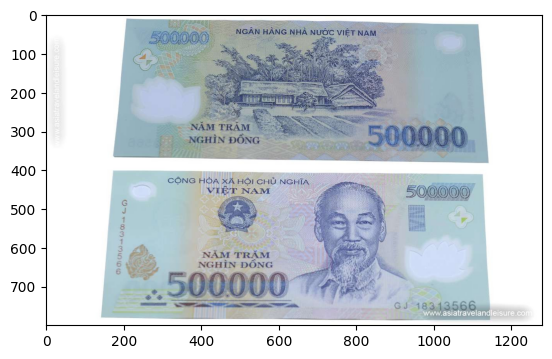

1/1 [==============================] - 0s 29ms/step
5000


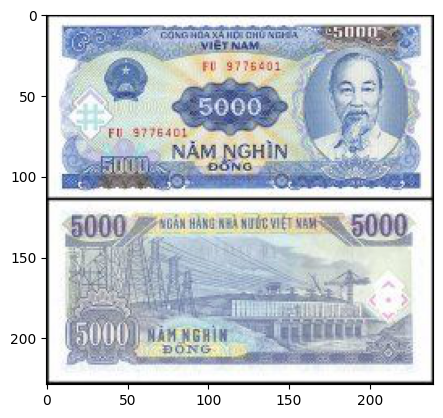

1/1 [==============================] - 0s 30ms/step
200.000


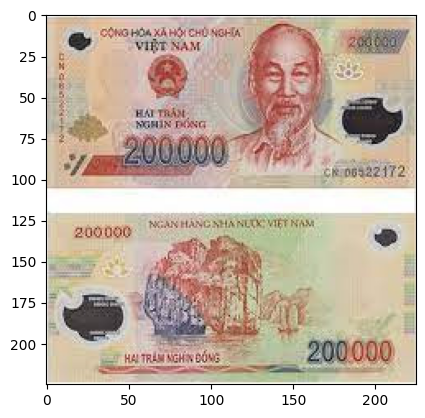

1/1 [==============================] - 0s 34ms/step
20.000


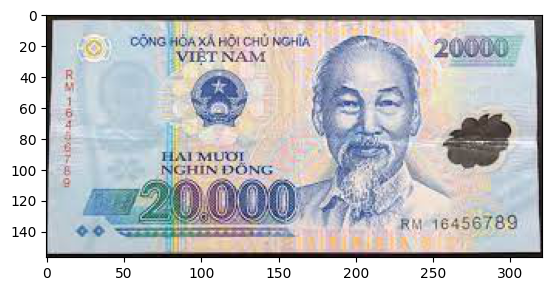

1/1 [==============================] - 0s 33ms/step
10000


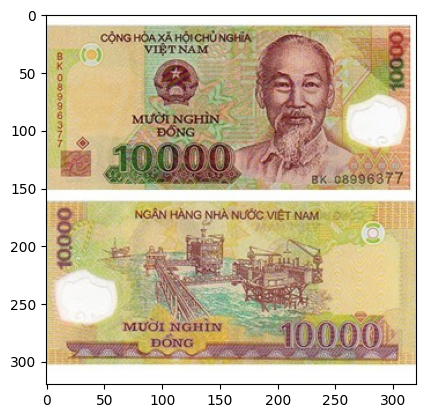

1/1 [==============================] - 0s 31ms/step
100.000


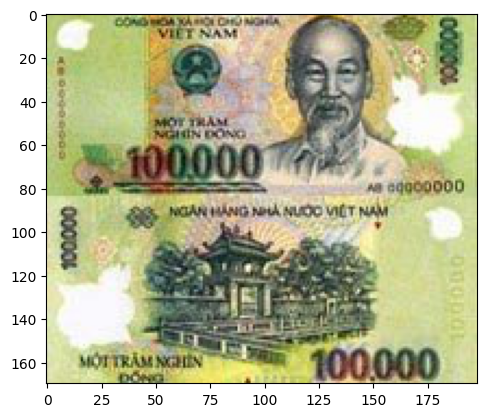

1/1 [==============================] - 0s 33ms/step
50.000


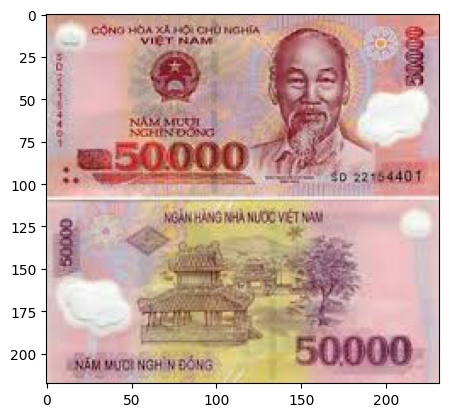

In [6]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/drive/MyDrive/PIC_TEST/vn_banknotes_test/'
for file in listdir(folder):
  if not file.endswith('.jpg'):
    continue # Skip directories and non-image files
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (100, 100))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name= {1: '5000', 2: '10000', 3: '20.000', 4: '50.000', 5: '100.000',6:'200.000',7:'500.000',  0: 'Unknown'}  # Include an entry for Unknown label
  print(class_name[result])
  plt.show()